## Mashroom edibility classifier for guidelines

#### Made using Adaboost on Decision tree classifier

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action = "ignore", category = FutureWarning)

## Data

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [3]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


almost all features are categorical

### Visualization

<Axes: xlabel='class', ylabel='count'>

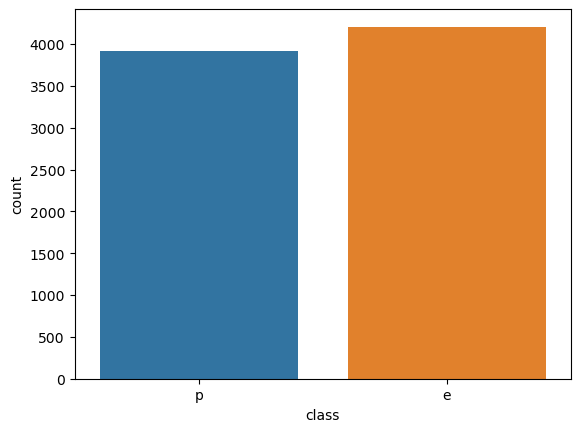

In [5]:
sns.countplot(data = df, x = "class")

In [6]:
unique = df.describe().transpose().reset_index().sort_values("unique")

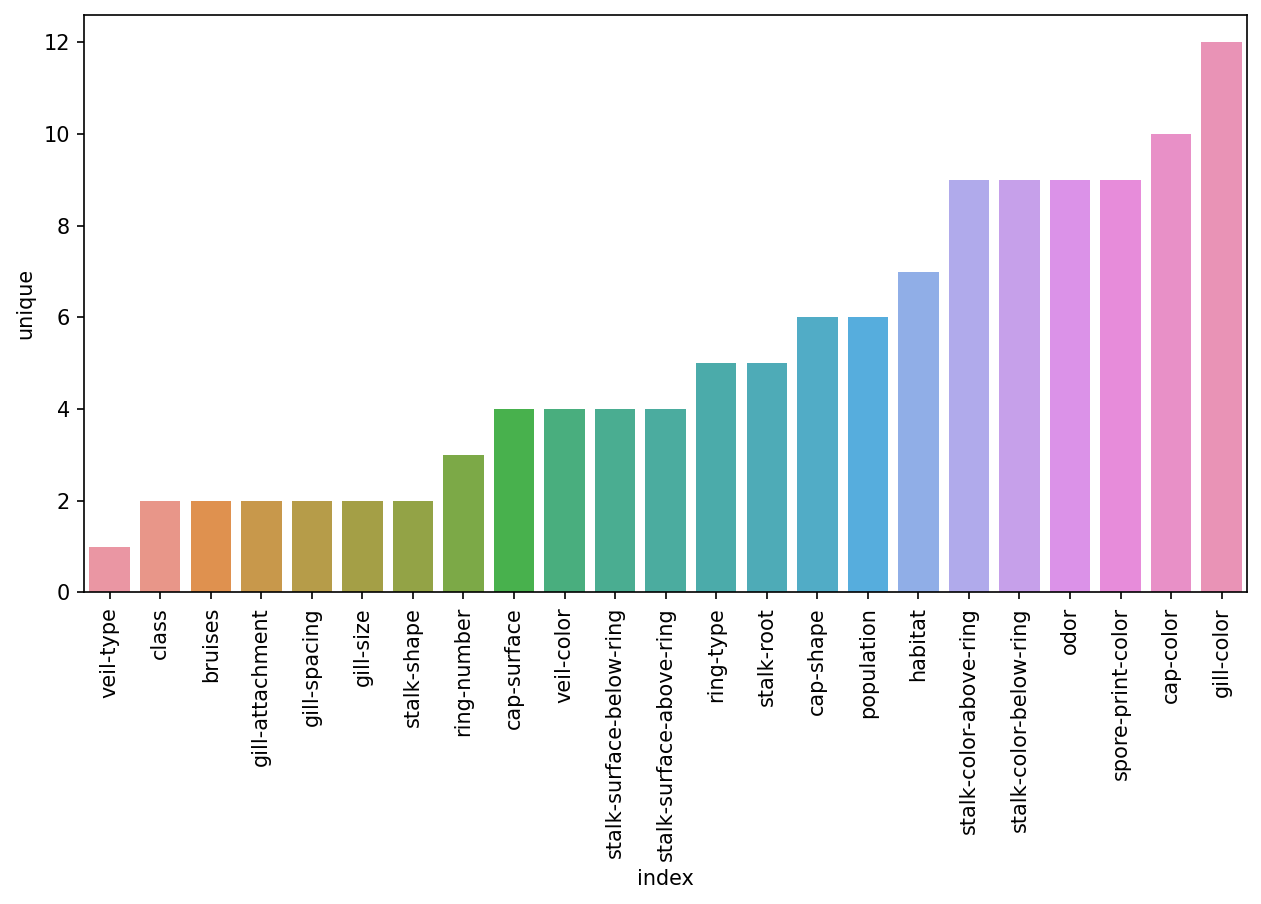

In [7]:
plt.figure(figsize = (10,5), dpi = 150)
sns.barplot(data = unique, x = "index", y = "unique")
plt.xticks(rotation = 90);

#### Scikit Learn imports

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

### Data processing

In [9]:
X = df.drop("class", axis = 1)
y = df["class"]

In [10]:
df_ = pd.read_csv("../DATA/mushrooms.csv")

In [11]:
X = pd.get_dummies(X, drop_first = True, dtype= float)      # string encoding

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

In [13]:
X_train

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6923,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7565,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1361,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1547,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Model 

In [14]:
stump_model = AdaBoostClassifier(n_estimators = 1)

In [15]:
stump_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [16]:
stump_predictions = stump_model.predict(X_test)

In [17]:
print(classification_report(y_test, stump_predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



Preety good performance

In [18]:
stump_model.feature_importances_.sum() 

1.0

In [19]:
stump_model.feature_importances_.argmax()

22

There is a single feature that contribute to the majority of the correct predictions

That feature being the **odour - "n"** of the mushroom

<Axes: xlabel='odor', ylabel='count'>

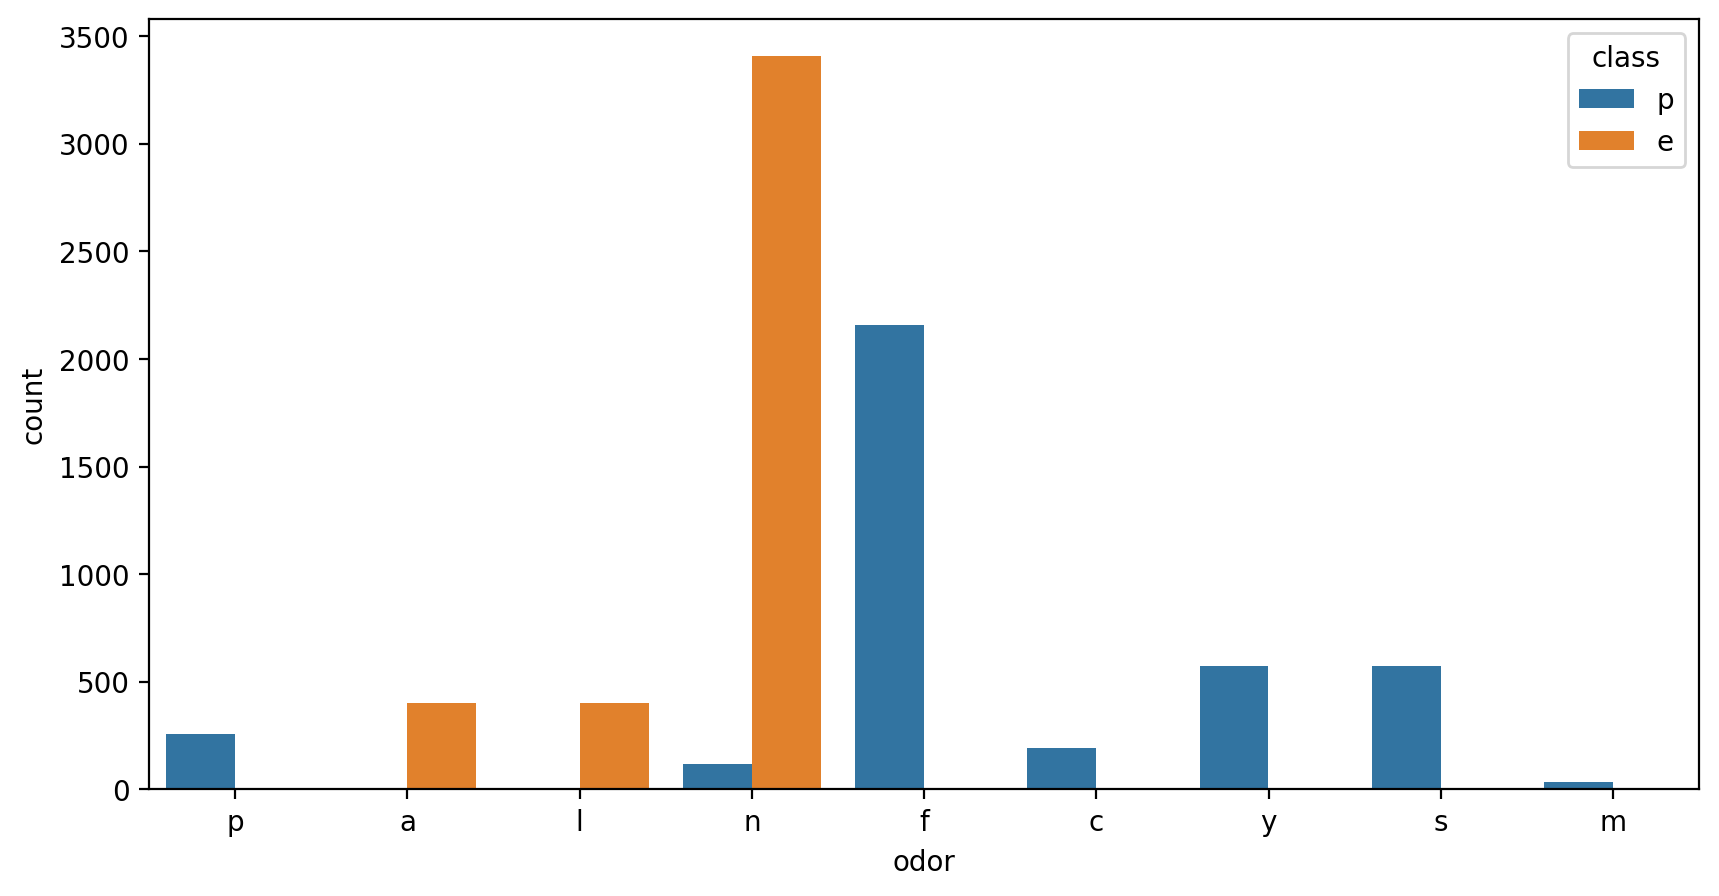

In [20]:
plt.figure(figsize = (10,5), dpi = 200)
sns.countplot(data = df_, x = "odor", hue = "class")

From here we can see that mushroom having **foul smell** are much more likly to be **poisonous**, 

and **no smell** to be **edible**

### Checking for error rate accross various boosted models

We could also do a grid search, but doing things this way we can plot the error rate against the stump count (similar to elbow method)

In [21]:
error_rate = []

for n in range(1, len(X.columns) + 1):
    m = AdaBoostClassifier(n_estimators = n)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    
    error = 1 - accuracy_score(y_test, pred)
    error_rate.append(error)

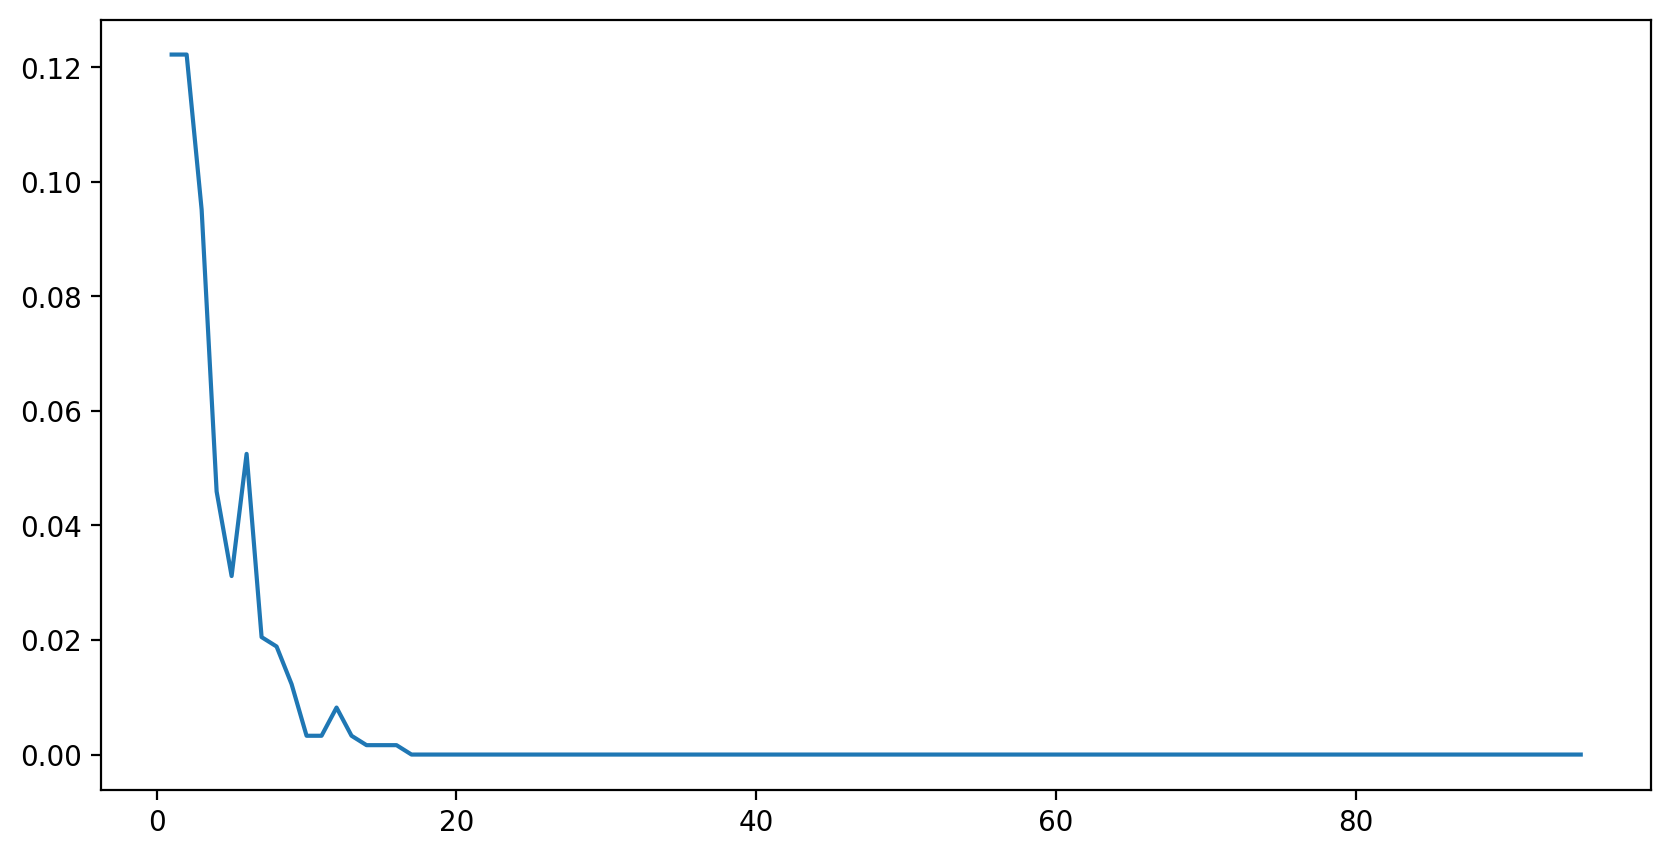

In [22]:
plt.figure(figsize = (10, 5), dpi = 200)
plt.plot(range(1, len(X.columns) + 1), error_rate)

After a little before 20 stump count we hit the maximum performance threshold

In [23]:
features = pd.DataFrame(index = X.columns, data = m.feature_importances_, columns = ["importance"])

In [24]:
features.transpose()  # Since most of the features contribute nothing towards the estimation, we filter them out

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
importance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010526,0.0,...,0.0,0.0,0.042105,0.0,0.0,0.0,0.0,0.0,0.0,0.010526


In [25]:
contributors = features[features["importance"] > 0]

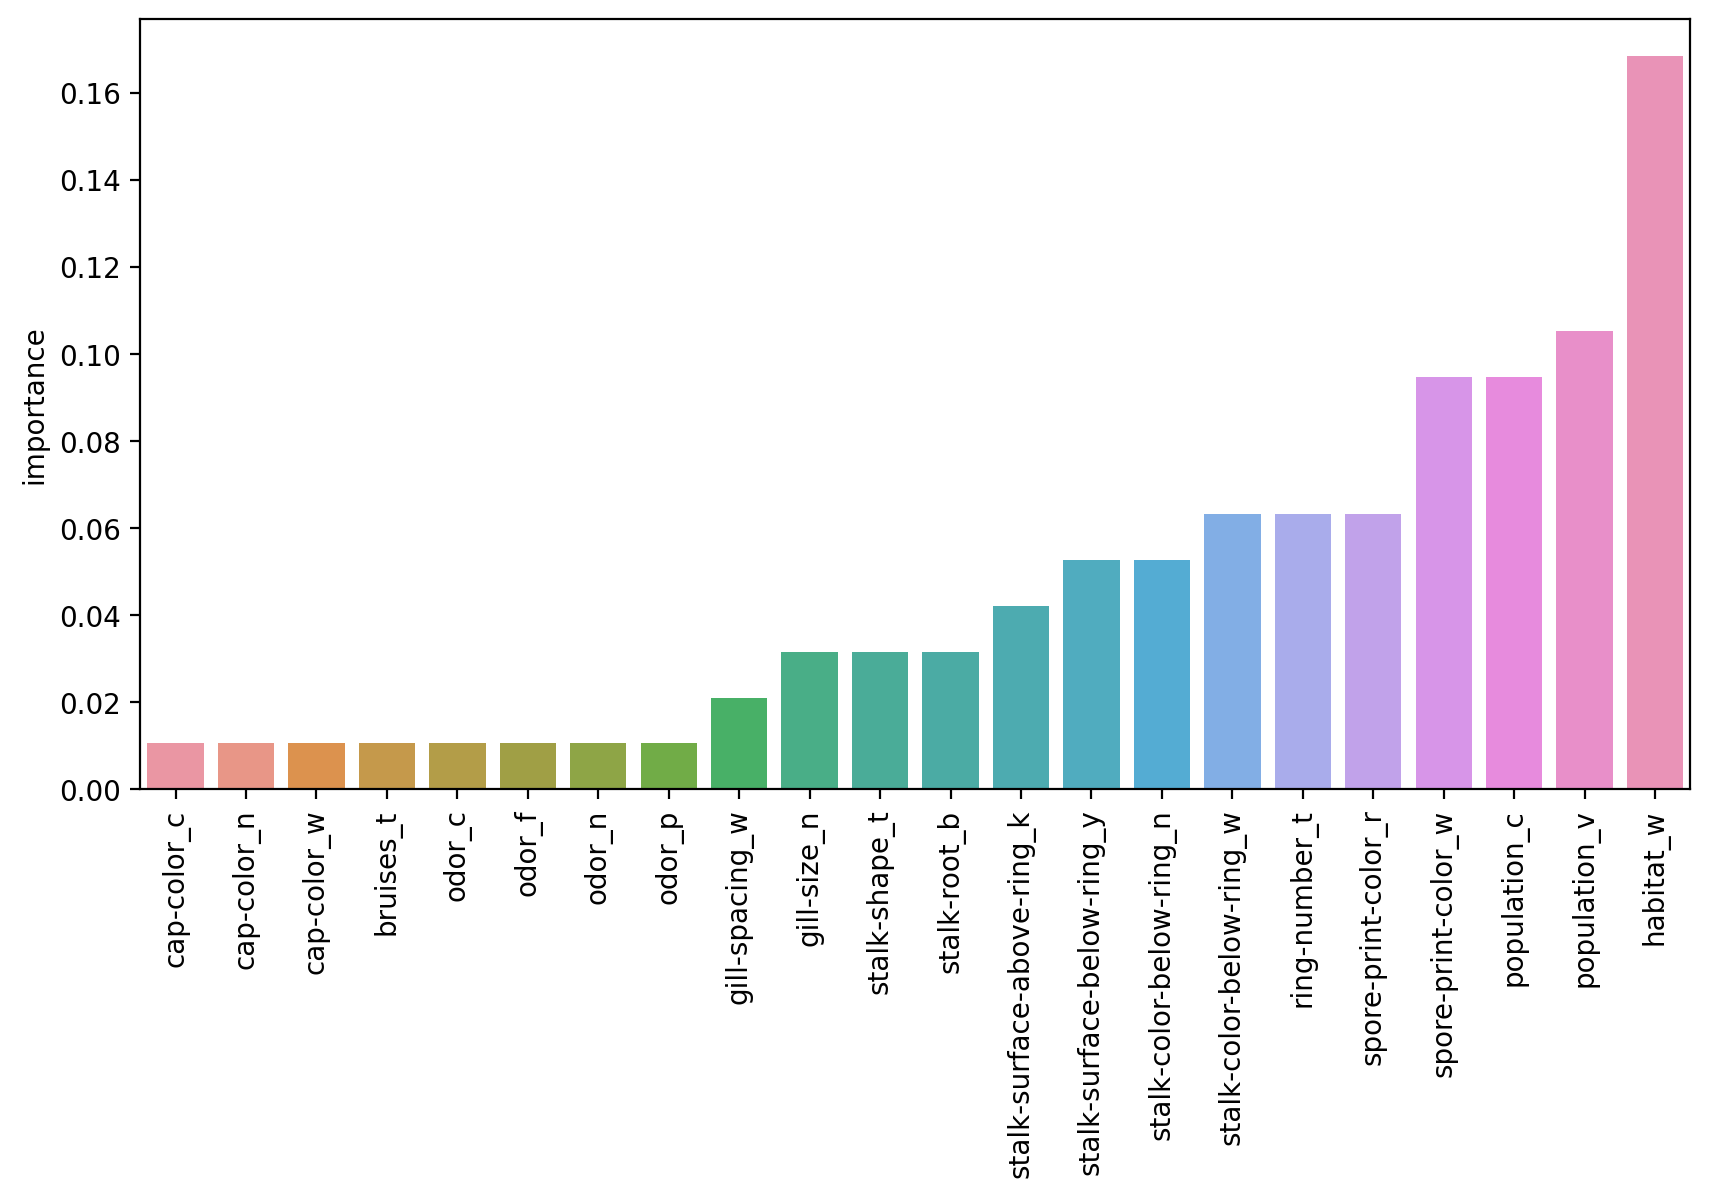

In [26]:
plt.figure(figsize = (10,5), dpi = 200)
sns.barplot(data = contributors.sort_values("importance"), x = contributors.index, y = "importance")
plt.xticks(rotation = 90);

### model for guidelines

In [27]:
model = AdaBoostClassifier(n_estimators = 7)

In [28]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=7)

In [29]:
prediction = model.predict(X_test)

In [30]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           e       0.98      0.98      0.98       655
           p       0.97      0.98      0.98       564

    accuracy                           0.98      1219
   macro avg       0.98      0.98      0.98      1219
weighted avg       0.98      0.98      0.98      1219



In [31]:
model.feature_importances_.nonzero()

(array([17, 19, 22, 28, 80, 87], dtype=int64),)

In [32]:
X.columns[[17, 19, 22, 80, 87]]

Index(['bruises_t', 'odor_f', 'odor_n', 'spore-print-color_r', 'population_v'], dtype='object')

# Guidelines for Mushroom identification

### 1. Mushrooms with bruises are more likely edible, unbruised mushrooms are genreally poinsonous

<Axes: xlabel='bruises', ylabel='count'>

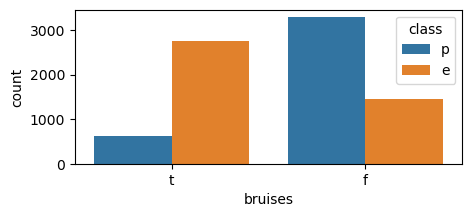

In [33]:
plt.figure(figsize=(5,2))
sns.countplot(data = df_, x = "bruises", hue = "class")

### 2. That mushroom having foul smell are much more likly to be poisonous 

<Axes: xlabel='odor', ylabel='count'>

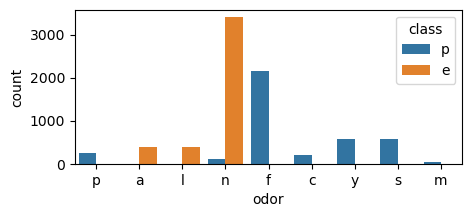

In [34]:
plt.figure(figsize=(5,2))
sns.countplot(data = df_, x = "odor", hue = "class")

### 3. Mushroom with black/brown spore are likely edible, while the ones having white or choclate aren't.

<Axes: xlabel='spore-print-color', ylabel='count'>

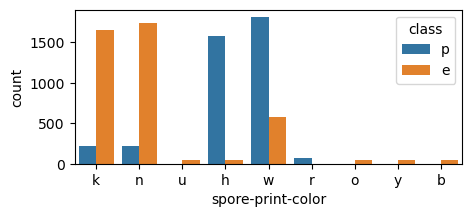

In [35]:
plt.figure(figsize=(5,2))
sns.countplot(data = df_, x = "spore-print-color", hue = "class")

### 4. Colonies with several mushrooms at once are likely inedible

<Axes: xlabel='population', ylabel='count'>

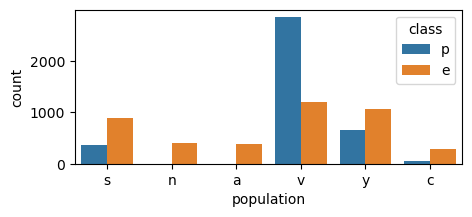

In [36]:
plt.figure(figsize=(5,2))
sns.countplot(data = df_, x = "population", hue = "class")